In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.io


In [9]:
# load mat file
import scipy.io as sio
mat_contents = sio.loadmat('data/omer_Pilot_continous_psych_2023-09-26_00h46.01.195.mat')
mat_contents.keys()
sigma=mat_contents['sigma']
target=mat_contents['target'] # velocity of target motion for 1200 frames (20 seconds) and 30 trials
response=mat_contents['response'] # velocity of participant's mouse movement for 1200 frames (20 seconds) and 30 trials
mouse_x=mat_contents['mouse_x'] # x position of participant's mouse movement for 1200 frames (20 seconds) and 30 trials
mouse_y=mat_contents['mouse_y'] # y position of participant's mouse movement for 1200 frames (20 seconds) and 30 trials
blob_x=mat_contents['blob_x'] # x position of target for trialNum200 frames (20 seconds) and 30 trials
blob_y=mat_contents['blob_y'] # y position of target for trialNum200 frames (20 seconds) and 30 trials
# get diff for velocity to find horizontal and vertical velocity
blob_x_velocity=np.diff(blob_x)
blob_y_velocity=np.diff(blob_y)
mouse_x_velocity=np.diff(mouse_x)
mouse_y_velocity=np.diff(mouse_y)


In [10]:
sigma

array([[11, 11, 11, 11, 11, 13, 13, 13, 13, 13, 25, 25, 25, 25, 25, 17,
        17, 17, 17, 17, 29, 29, 29, 29, 29, 21, 21, 21, 21, 21]])

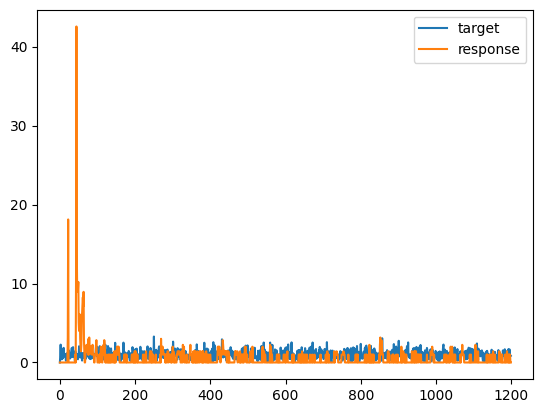

In [11]:
# plot the data
trialNum=0
plt.plot(target[trialNum,:])
plt.plot(response[1,:])
plt.legend(['target','response'])
plt.show()


In [12]:

sigma

array([[11, 11, 11, 11, 11, 13, 13, 13, 13, 13, 25, 25, 25, 25, 25, 17,
        17, 17, 17, 17, 29, 29, 29, 29, 29, 21, 21, 21, 21, 21]])

In [13]:
# create key-value pairs for the dictionary of 30 trials
trial_dict = {}
for i in range(30):
    trial_dict[i] = {'target': target[i,:], 'response': response[i,:], 'mouse_x': mouse_x[i,:], 'mouse_y': mouse_y[i,:], 'blob_x': blob_x[i,:], 'blob_y': blob_y[i,:]}


In [17]:
# dictionary of 5 sigma values and trialNums
sigma_dict = {11: 0, 13: 1, 25: 2, 17:3,29:4,21:5}
sigma

array([[11, 11, 11, 11, 11, 13, 13, 13, 13, 13, 25, 25, 25, 25, 25, 17,
        17, 17, 17, 17, 29, 29, 29, 29, 29, 21, 21, 21, 21, 21]])

In [18]:
sigma_dict[25]*5
sigma_dict

{11: 0, 13: 1, 25: 2, 17: 3, 29: 4, 21: 5}

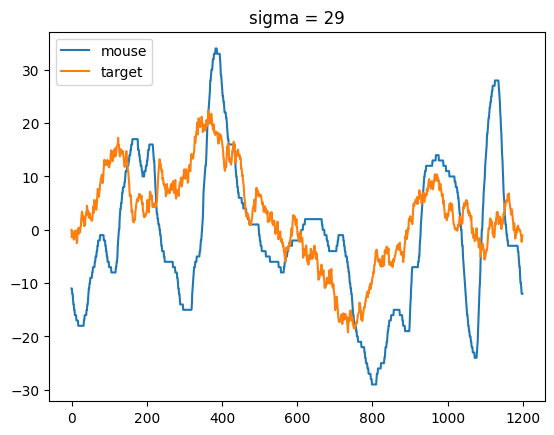

In [19]:
# plot motion trajectory for a single trial
# select trial number from sigma_dict.keys() when sigma is 11
selected_sigma = 29
trialNum= sigma_dict[selected_sigma]*5+2
plt.plot(mouse_y[trialNum,:])
plt.plot(blob_y[trialNum,:])
plt.legend(['mouse','target'])
plt.title('sigma = '+str(selected_sigma))
plt.show()


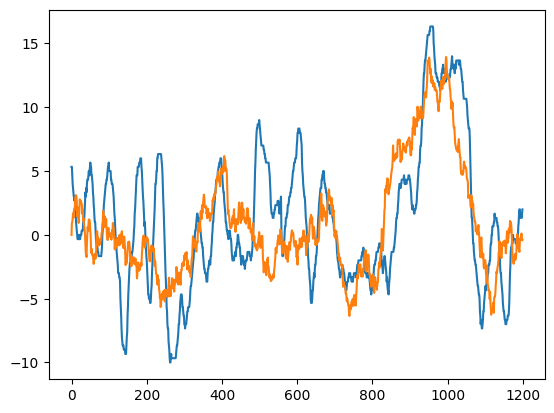

In [20]:
# avarage motion trajectory for trials with the same sigma value
for i in range(4,5):
    # get mean of mouse_x for trials untill sigma value changes
    mean_mouse_x = np.mean(mouse_x[i*3:(i+1)*3,:], axis=0)
    # get mean of blob_x for trials untill sigma value changes
    mean_blob_x = np.mean(blob_x[i*3:(i+1)*3,:], axis=0)
    # plot the mean of mouse_x and blob_x
    plt.plot(mean_mouse_x)
    plt.plot(mean_blob_x)
    #plt.legend(str(i))

plt.show()

In [21]:
# sigma is blob width of the target on each trial
# sigma is constant for 5 trials and then changes
# calculate mean of mouse_x and blob_x for trials with the same sigma value
# plot the mean of mouse_x and blob_x for trials with the same sigma value  (5 plots)
mean_mouse_xs=[]
mean_blob_xs=[]
mean_mouse_ys=[]
mean_blob_ys=[]
mean_mouse_vs=[]
mean_blob_vs=[]
for i in range(0,6):
    # get mean of mouse_x for trials untill sigma value changes
    mean_mouse_xs.append(np.mean(mouse_x[i*5:(i+1)*5,:], axis=0))
    # get mean of blob_x for trials untill sigma value changes
    mean_blob_xs.append( np.mean(blob_x[i*5:(i+1)*5,:], axis=0))
    mean_blob_ys.append( np.mean(blob_y[i*5:(i+1)*5,:], axis=0))
    mean_mouse_ys.append( np.mean(mouse_y[i*5:(i+1)*5,:], axis=0))
    mean_mouse_vs.append( np.mean(response[i*5:(i+1)*5,:], axis=0))
    mean_blob_vs.append( np.mean(target[i*5:(i+1)*5,:], axis=0))


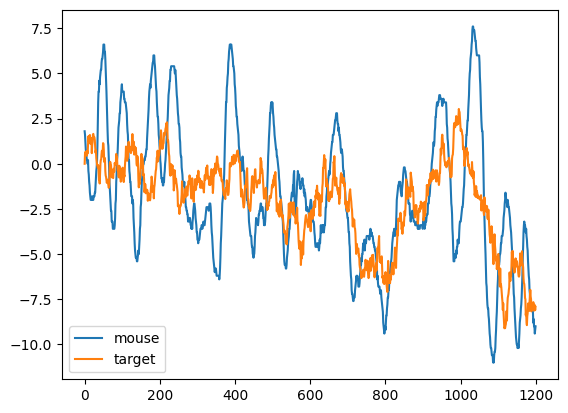

In [22]:

selected_sigma = 25
# plot the mean of mouse_x and blob_x
plt.plot(mean_mouse_xs[sigma_dict[selected_sigma]])
plt.plot(mean_blob_xs[sigma_dict[selected_sigma]])
# color the plot with the same color for the same sigma value

plt.legend(['mouse','target'])

# Cross Correlogram

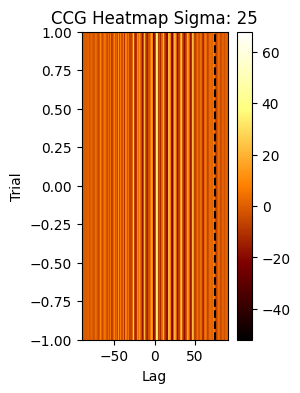

In [29]:
selected_sigma = 25
trialNum=sigma_dict[selected_sigma]*5+0
# Normalize the signals
#normalized_target = (target[trialNum, :] - np.mean(target[trialNum, :])) / np.std(target[trialNum, :])
#normalized_response = (response[trialNum, :] - np.mean(response[trialNum, :])) / np.std(response[trialNum, :])
X=mouse_x_velocity[trialNum, :]
Y=blob_x_velocity[trialNum, :]

ccg=  np.correlate(X, Y, 'full')
lag_range = 90
ccg_range = ccg[600 - lag_range : 601 + lag_range]
# Create a time vector for the lag range
time_vector = np.arange(-lag_range, lag_range + 1)
# Create heatmap
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow([ccg], cmap='afmhot', aspect='auto', extent=[-lag_range, lag_range, -1, 1])
plt.title('CCG Heatmap Sigma: '+ str(selected_sigma))
plt.xlabel('Lag')
plt.ylabel('Trial')
plt.colorbar()

# Trace peak
peak_index = np.argmax(ccg_range) - lag_range
plt.axvline(peak_index, color='black', linestyle='--')

# Calculate and display average
# average_corr = np.corrcoef(target[trialNum,:], response[trialNum,:])[0, 1]
# plt.subplot(1, 3, 3)
# plt.text(0.5, 0.5, f'Avg Corr: {average_corr:.2f}', ha='center', va='center', fontsize=12)
# plt.title('Cross Correlation of ' + str(selected_sigma))
# plt.axis('off')
# plt.show()

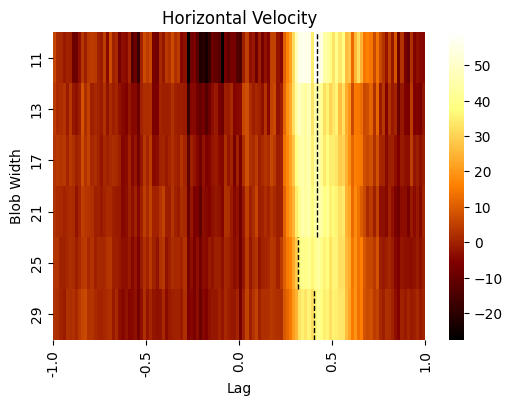

In [132]:
# avarage cross correlation for trials with the same sigma value
sigma_dict = {11: 0, 13: 1, 25: 2, 17:3,29:4,21:5}
blob_widths=[11,13,17,21,25,29]
#blob_widths=[29,25,21,17,13,11]
mean_ccgs=[]
ccg_blob_mean=[]
ccg_single_blob=[]
frameRate=60
lag_time=1 # seconds
lag_range = int(lag_time*frameRate)
len_trial=len(target[0,:])
mid_trial=int(len_trial/2)
for blob_width in blob_widths:
    for i in range(5):
        trialNum=sigma_dict[blob_width]*5+i
        X=mouse_x_velocity[trialNum, :]
        Y=blob_x_velocity[trialNum, :]
        ccg_single_trial=  np.correlate(X, Y, 'full')
        ccg_single_trial = ccg_single_trial[len_trial - lag_range : len_trial + lag_range]
        ccg_single_blob.append(ccg_single_trial)
    ccg_blob_mean.append(np.mean(ccg_single_blob, axis=0))


# create heatmap for mean of cross correlation for trials with the same sigma value
plt.figure(figsize=(6, 4))
sns.heatmap(ccg_blob_mean, cmap='afmhot',yticklabels=blob_widths)

# set x axis ticks from -120 to 120 with ticks at every 20 units
x=np.linspace(0, frameRate*lag_time*2, 5)
labels=np.linspace(-lag_time, lag_time, len(x))
plt.xticks(x, labels, rotation='vertical')
#plt.imshow(ccg_blob_mean, cmap='afmhot', aspect='auto', yticklabels=blob_widths)
plt.title('Horizontal Velocity')
plt.xlabel('Lag')
plt.ylabel('Blob Width')

# Find lag indices of peaks in each row
peak_indices = np.argmax(ccg_blob_mean, axis=1)
# Trace peak for each blob width
# Add peak lines to the heatmap
for i, peak_index in enumerate(peak_indices):
    plt.axvline(x=peak_index, color='black', linestyle='--', linewidth=1, ymin=i/len(blob_widths), ymax=(i+1)/len(blob_widths))
plt.show()
#plt.colorbar()


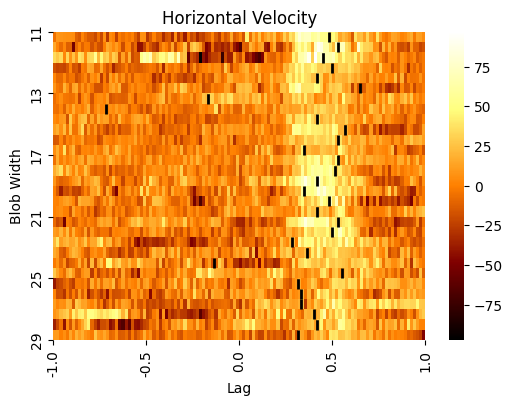

In [149]:

# create heatmap for mean of cross correlation for trials with the same sigma value
plt.figure(figsize=(6, 4))
sns.heatmap(ccg_single_blob, cmap='afmhot')

# set x axis ticks from -120 to 120 with ticks at every 20 units
x=np.linspace(0, frameRate*lag_time*2, 5)
labels=np.linspace(-lag_time, lag_time, len(x))
plt.xticks(x, labels, rotation='vertical')
## set y axis ticks based on blob widths so that each 5 rows are for the same blob width
yticks=np.linspace(0, len(ccg_single_blob), 6)
yticklabels=blob_widths
plt.yticks(yticks, yticklabels)



#plt.imshow(ccg_blob_mean, cmap='afmhot', aspect='auto', yticklabels=blob_widths)
plt.title('Horizontal Velocity')
plt.xlabel('Lag')
plt.ylabel('Blob Width')

# Find lag indices of peaks in each row
peak_indices = np.argmax(ccg_single_blob, axis=1)
# Trace peak for each blob width
# Add peak lines to the heatmap
for i, peak_index in enumerate(peak_indices):
    #plt.axvline(x=peak_index, color='black', linestyle='--', linewidth=1, ymin=i/len(blob_widths), ymax=(i+1)/len(blob_widths))
    plt.axvline(x=peak_index, color='black', linestyle='--', linewidth=2, ymin=i/30, ymax=(i+1)/30)
plt.show()


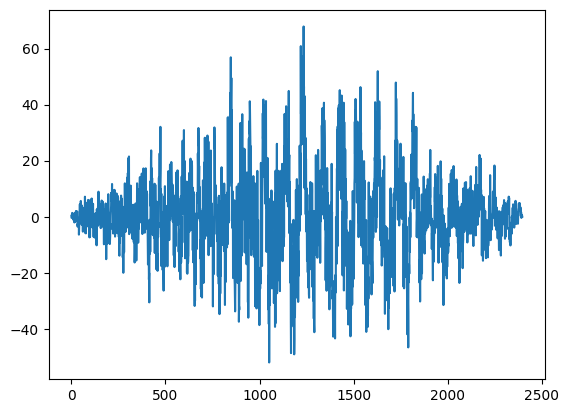

In [ ]:
plt.plot(ccg)

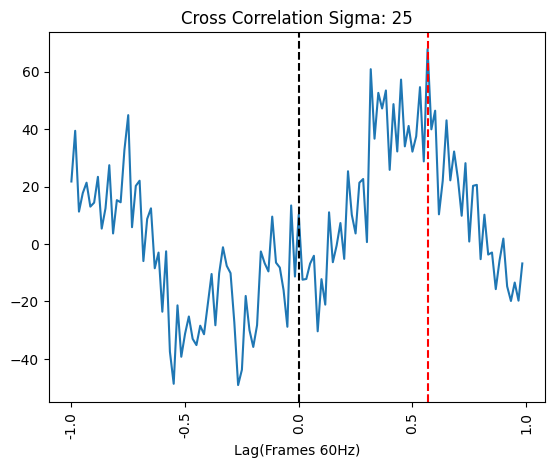

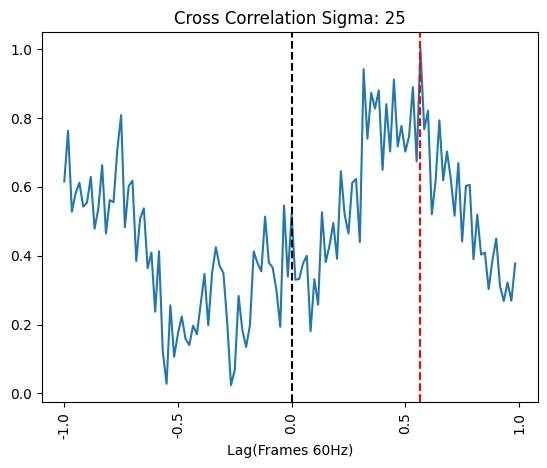

In [150]:
# plot corss-correlation for a single trial
frameRate=60
time_lag=1 # seconds
steps=int(frameRate*time_lag)
plt.plot(ccg[1200-steps:1200+steps])

# set x axis ticks from -120 to 120 with ticks at every 20 units
x=np.linspace(0, frameRate*time_lag*2, 5)
labels=np.linspace(-time_lag, time_lag, len(x))
plt.xticks(x, labels, rotation='vertical')

#plot a vertical line at lag=0
plt.axvline(time_lag*frameRate, color='black', linestyle='--')
# calculate highest correlation
max_corr=np.max(ccg[1200-steps:1200+steps])
max_corr_index=np.argmax(ccg[1200-steps:1200+steps])
# plot the highest correlation
#plt.axhline(max_corr, color='black', linestyle='--')
plt.axvline(max_corr_index, color='red', linestyle='--')
plt.title('Cross Correlation Sigma: ' + str(selected_sigma))
plt.xlabel('Lag(Frames 60Hz)')
plt.show()


# normalize the correlation and then re-plot
def normalized(x):
    return ((x-x.min())/(x.max()-x.min()))
normalized_ccg=normalized(ccg)
plt.plot(normalized_ccg[1200-steps:1200+steps])
# set x axis ticks from -120 to 120 with ticks at every 20 units
x=np.linspace(0, frameRate*time_lag*2, 5)
labels=np.linspace(-time_lag, time_lag, len(x))
# set x axis ticks from -120 to 120 with ticks at every 20 units
x=np.linspace(0, frameRate*time_lag*2, 5)
labels=np.linspace(-time_lag, time_lag, len(x))
plt.xticks(x, labels, rotation='vertical')

#plot a vertical line at lag=0
plt.axvline(time_lag*frameRate, color='black', linestyle='--')
# calculate highest correlation
max_corr=np.max(ccg[1200-steps:1200+steps])
max_corr_index=np.argmax(ccg[1200-steps:1200+steps])
# plot the highest correlation
#plt.axhline(max_corr, color='black', linestyle='--')
plt.axvline(max_corr_index, color='red', linestyle='--')
plt.title('Cross Correlation Sigma: ' + str(selected_sigma))
plt.xlabel('Lag(Frames 60Hz)')
plt.show()



In [ ]:

# plot avarage corss-correlation across 1 second (60 frame) intervals lag
avarage_ccg=[]
for i in range(0,60):
    avarage_ccg.append(np.mean(ccg[i*60:(i+1)*60]))
plt.plot(avarage_ccg)
plt.show()



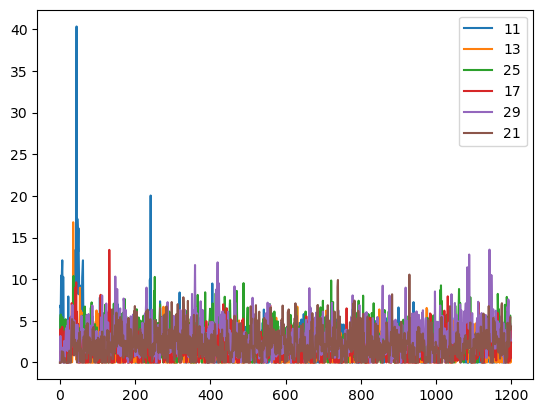

In [ ]:
# avarage cross correlogram of velocity of mouse and target motion for trials with the same sigma valu
# Figure 4. Average CCGs for blob width (curve color, identified in the legend by their r in arcmin) for each of the three observers (panel). The peak height, location of peak, and width of curve (however measured) all sort neatly by blob width, with the more visible targets yielding higher, prompter, and sharper curves. This shows that there is at least a qualitative agreement between measures of tracking performance and what would be expected from a traditional psychophysical experiment

# calculate correlation of blob_v and mouse_v value across 1200 frames 
# correlation_across_frames=[]
# blob_width=sigma_dict[13]
# for i in range(1200):
#     correlation_across_frames.append(np.correlate(target[blob_width*5:(blob_width+1)*5,i], response[blob_width*5:(blob_width+1)*5,i]))
# # plot the correlation
# plt.plot(correlation_across_frames)
# plt.show()
import scipy.signal  

##
# now create cross correlogram plot for each blob width and label them with blob width
for sigma in sigma_dict.keys():
    blob_width=sigma_dict[sigma]
    correlation_across_frames=[]    
    for i in range(1200):
        correlation_across_frames.append(np.correlate(target[blob_width*5:(blob_width+1)*5,i], response[blob_width*5:(blob_width+1)*5,i]))
    # plot the correlation
    plt.plot(correlation_across_frames, label=sigma)
plt.legend()
plt.show()
